In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ruta_archivo1 = "Datasets/Alternative Fuel Vehicles US.csv"
df1 = pd.read_csv(ruta_archivo1)

df1.head()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      444 non-null    float64
 11  Conventional Fuel Economy Highway   444 non-n

# ETL

Eliminammos columnas irrelevantes o que tienen demasiados nulos

In [4]:
df1.drop(["PHEV Total Range","Heavy-Duty Power System","Transmission Make","Notes"], axis=1, inplace=True)


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   Alternative Fuel Economy City       169 non-null    float64
 7   Alternative Fuel Economy Highway    169 non-null    float64
 8   Alternative Fuel Economy Combined   262 non-null    float64
 9   Conventional Fuel Economy City      444 non-null    float64
 10  Conventional Fuel Economy Highway   444 non-null    float64
 11  Conventional Fuel Economy Combined  444 non-n

Cambiamos el nombre las columnas para poder manipularlas más fácilmente.

In [6]:
df1.rename({
    "Category": "Categoría",
    "Model": "Modelo",
    "Model Year": "Año_modelo",
    "Manufacturer": "Marca_auto",
    "Fuel": "Combustible",
    "All-Electric Range": "Autonomia_electrico",
    "Alternative Fuel Economy City": "m/g_alt_ciudad",
    "Alternative Fuel Economy Highway": "m/g_Alt_Carretera",
    "Alternative Fuel Economy Combined": "m/g_Alt_Combinada",
    "Conventional Fuel Economy City": "m/g_Conv_Ciudad",
    "Conventional Fuel Economy Highway": "m/g_Conv_Carretera",
    "Conventional Fuel Economy Combined": "m/g_Conv_Combinada",
    "Transmission Type": "Transmisión",
    "Engine Type": "Tipo_Motor",
    "Engine Size": "Tamaño_Motor",
    "Engine Cylinder Count": "Cantidad_Cilindros",
    "Number of Passengers": "Capacidad_Pasajeros",
    "Drivetrain": "Tracción"
}, axis=1, inplace=True)


In [7]:
df1['Tamaño_Motor'] = df1['Tamaño_Motor'].str.replace('L', '')

In [8]:
df1 = df1.rename(columns={'Tamaño_Motor': 'Tamaño_Motor(L)'})


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Categoría            882 non-null    object 
 1   Modelo               882 non-null    object 
 2   Año_modelo           594 non-null    float64
 3   Marca_auto           882 non-null    object 
 4   Combustible          882 non-null    object 
 5   Autonomia_electrico  222 non-null    float64
 6   m/g_alt_ciudad       169 non-null    float64
 7   m/g_Alt_Carretera    169 non-null    float64
 8   m/g_Alt_Combinada    262 non-null    float64
 9   m/g_Conv_Ciudad      444 non-null    float64
 10  m/g_Conv_Carretera   444 non-null    float64
 11  m/g_Conv_Combinada   444 non-null    float64
 12  Transmisión          640 non-null    object 
 13  Tipo_Motor           589 non-null    object 
 14  Tamaño_Motor(L)      589 non-null    object 
 15  Cantidad_Cilindros   449 non-null    flo

# EDA

Estadísticas descriptivas:

- Año_modelo: Los datos están concentrados en torno a 2021 y 2022.

- Autonomia_electrico: La autonomía eléctrica tiene un promedio de 165.93 millas, con una gran variabilidad (std de 132.99), lo que indica que hay una amplia gama de rendimientos entre vehículos eléctricos.

- Eficiencia de Combustible Alternativo (Ciudad, Carretera, Combinada): Las variables de eficiencia de combustible alternativo (`m/g_alt_ciudad`, `m/g_Alt_Carretera`, `m/g_Alt_Combinada`) muestran una alta eficiencia promedio, especialmente en la ciudad (84.59), lo que sugiere que los vehículos con combustibles alternativos tienden a ser eficientes, especialmente en entornos urbanos.

- Eficiencia de Combustible Convencional (Ciudad, Carretera, Combinada): La eficiencia de combustible convencional (`m/g_Conv_Ciudad`, `m/g_Conv_Carretera`, `m/g_Conv_Combinada`) es considerablemente menor en comparación con la eficiencia de combustible alternativo, con un promedio en ciudad de 25.90.

- Cantidad de Cilindros: El número promedio de cilindros es 5.45, con una variabilidad relativamente baja (std de 1.40), indicando que la mayoría de los vehículos tienen entre 4 y 6 cilindros.

- Valores Extremos en Eficiencia de Combustible Convencional en Carretera: Existe un valor máximo atípicamente alto en la eficiencia de combustible convencional en carretera (`m/g_Conv_Carretera`), que es 231. Esto corresponde a un Audi Q8 y con toda seguridad es un error, y debe ser 23.1.


In [10]:
print(df1.describe())

        Año_modelo  Autonomia_electrico  m/g_alt_ciudad  m/g_Alt_Carretera  \
count   594.000000           222.000000      169.000000         169.000000   
mean   2021.538721           165.927928       84.585799          77.591716   
std       0.498919           132.992955       39.430696          32.735123   
min    2021.000000             8.000000       10.000000          12.000000   
25%    2021.000000            23.000000       71.000000          66.000000   
50%    2022.000000           203.000000       94.000000          85.000000   
75%    2022.000000           260.000000      115.000000          99.000000   
max    2022.000000           520.000000      150.000000         133.000000   

       m/g_Alt_Combinada  m/g_Conv_Ciudad  m/g_Conv_Carretera  \
count         262.000000       444.000000          444.000000   
mean           75.992366        25.900901           30.085586   
std            32.303279        10.860665           12.815653   
min            11.000000        13.00

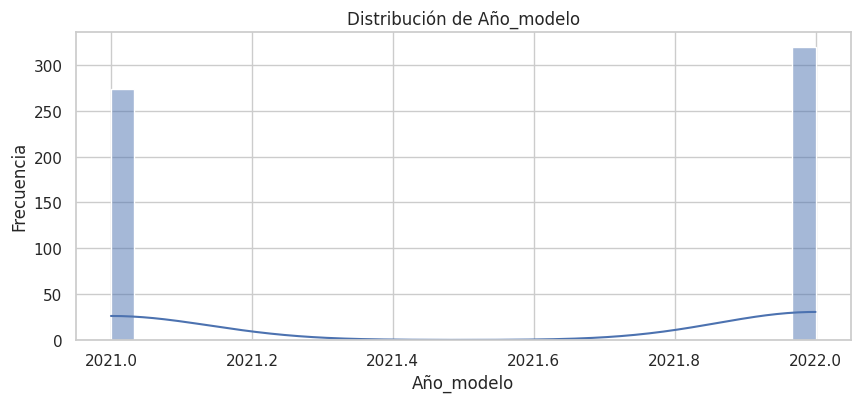

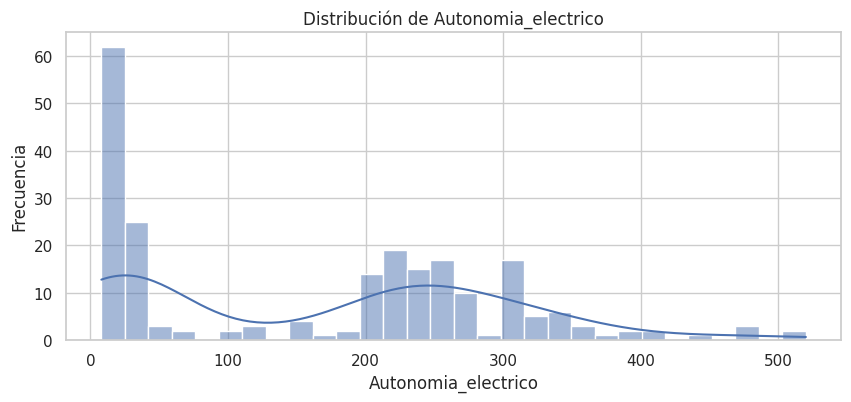

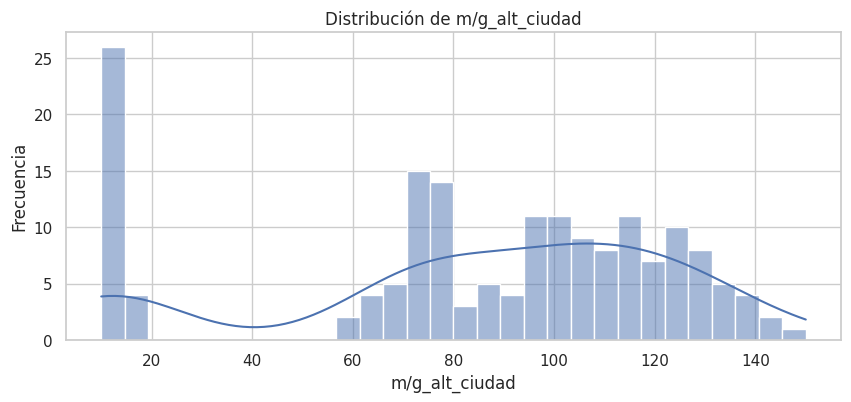

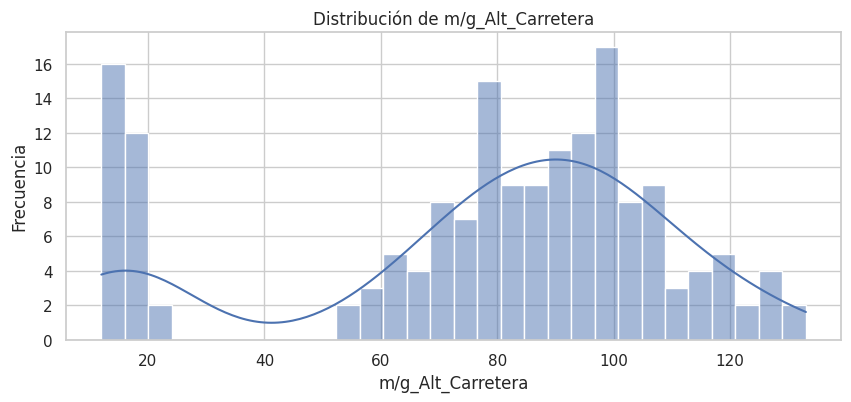

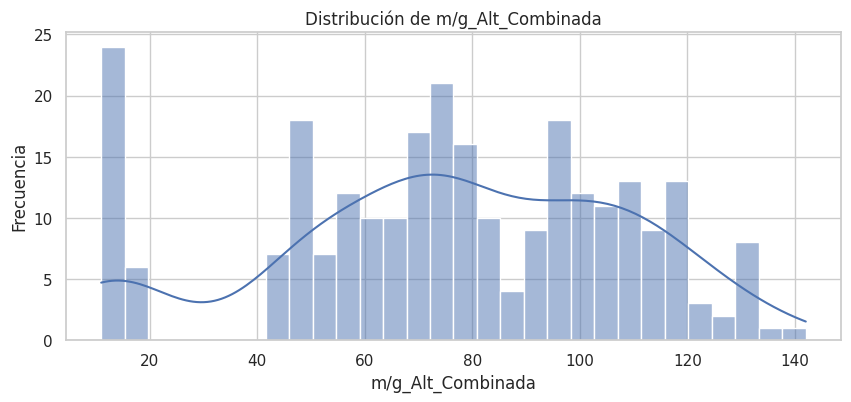

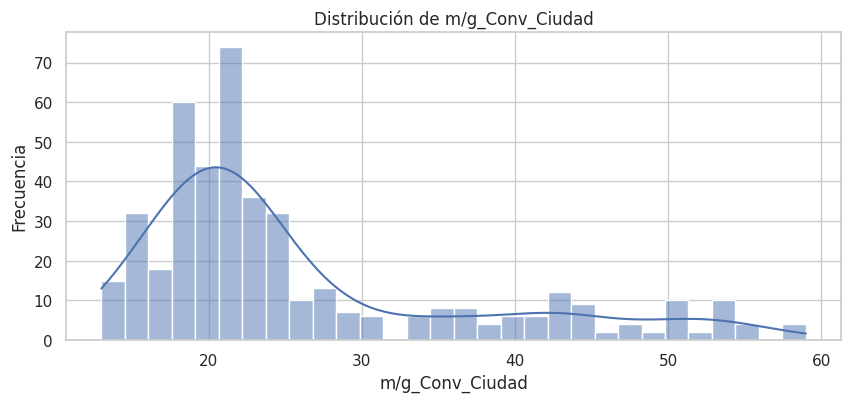

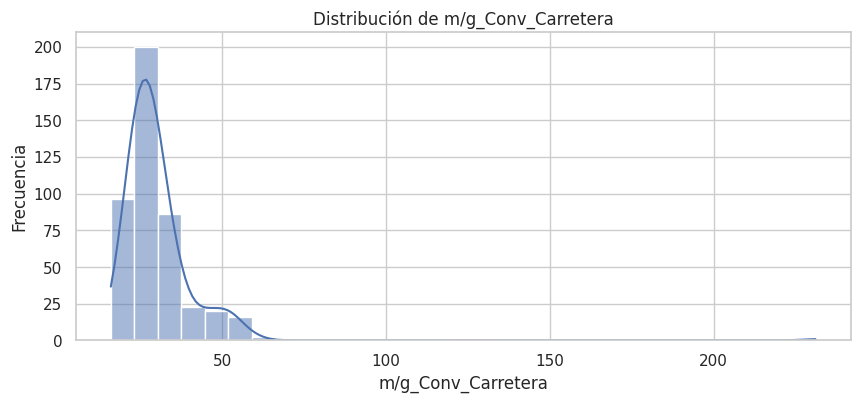

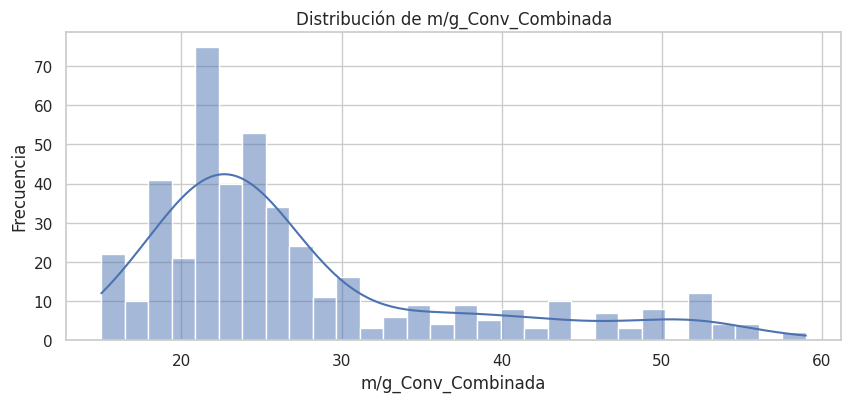

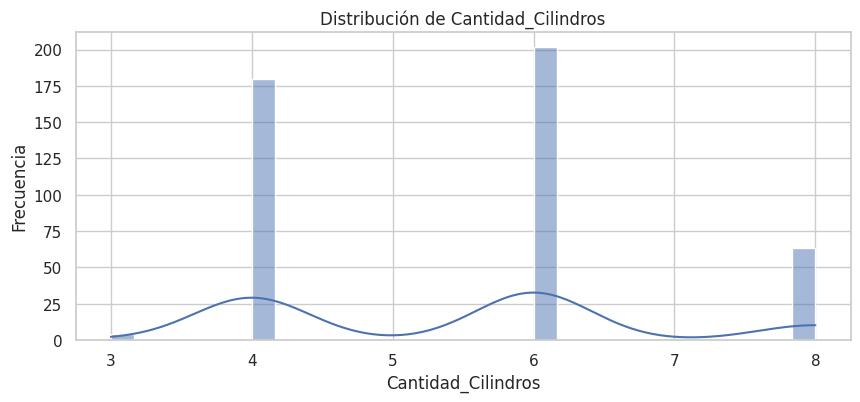

In [11]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Histogramas de variables numéricas actualizadas con los nuevos nombres
num_columns = ['Año_modelo', 'Autonomia_electrico', 'm/g_alt_ciudad', 'm/g_Alt_Carretera', 'm/g_Alt_Combinada', 
               'm/g_Conv_Ciudad', 'm/g_Conv_Carretera', 'm/g_Conv_Combinada', 'Cantidad_Cilindros']

for column in num_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df1[column], kde=True, bins=30)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()



In [12]:
# Conteo de valores nulos
print(df1[num_columns].isnull().sum())


Año_modelo             288
Autonomia_electrico    660
m/g_alt_ciudad         713
m/g_Alt_Carretera      713
m/g_Alt_Combinada      620
m/g_Conv_Ciudad        438
m/g_Conv_Carretera     438
m/g_Conv_Combinada     438
Cantidad_Cilindros     433
dtype: int64


Relación Negativa entre Eficiencia de Combustible y Cantidad de Cilindros: se aprecia una correlación negativa entre Cantidad_Cilindros con todas las mediciones de eficiencia de combustible, tanto alternativas como convencionales. Esto podría sugerir que a mayor número de cilindros, generalmente hay una disminución en la eficiencia del combustible del vehículo.

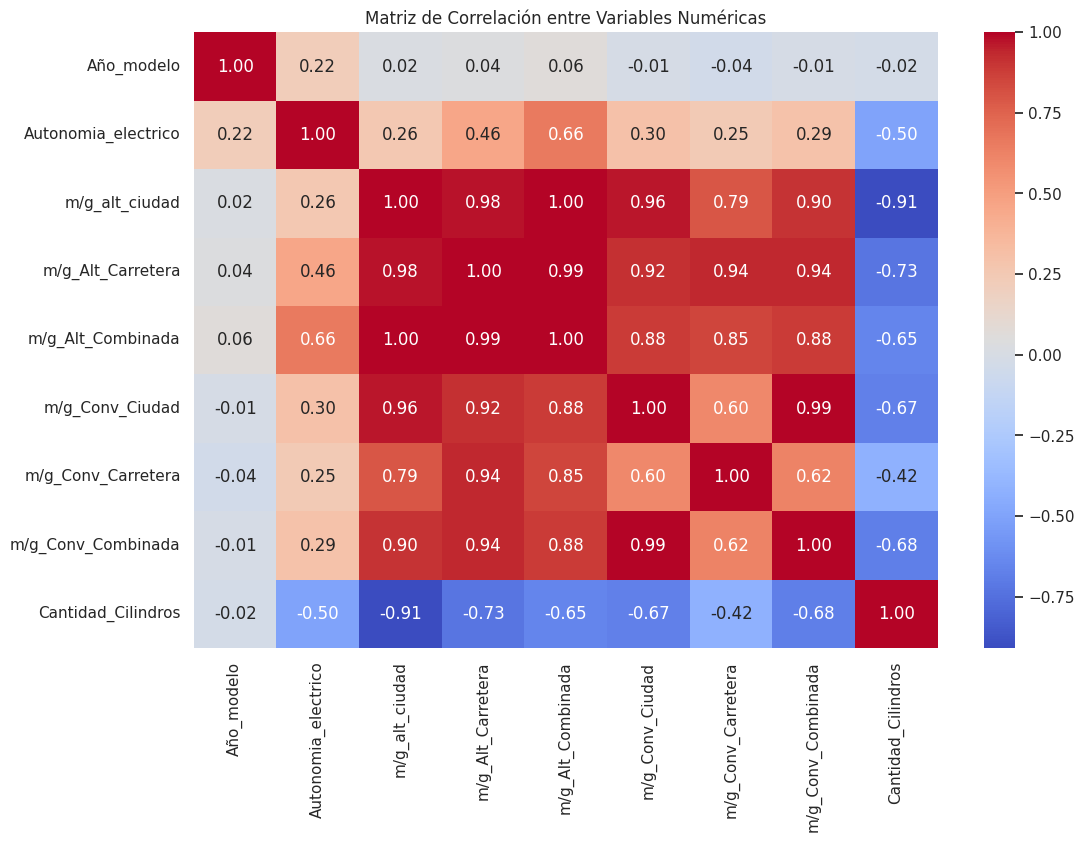

In [13]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df1[num_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


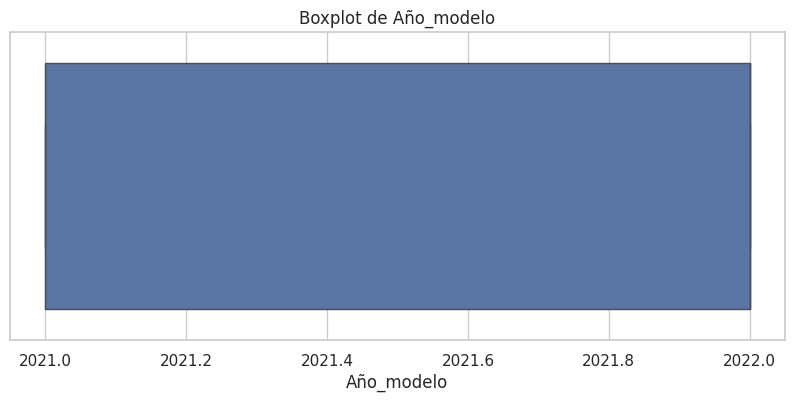

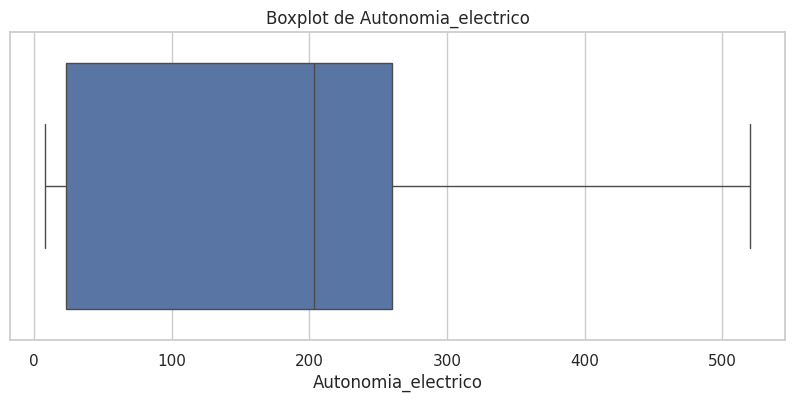

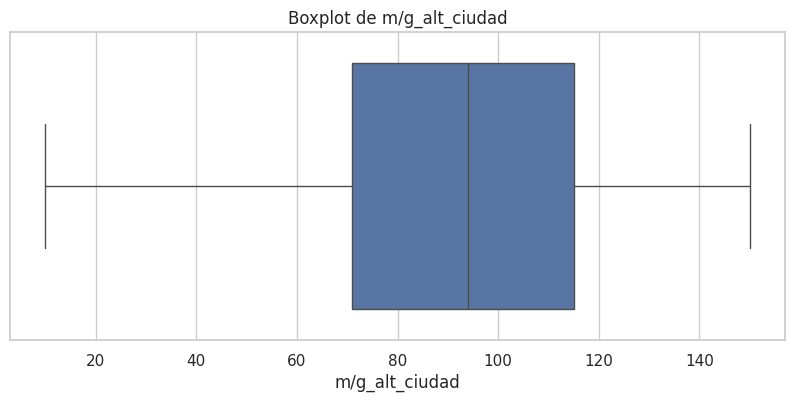

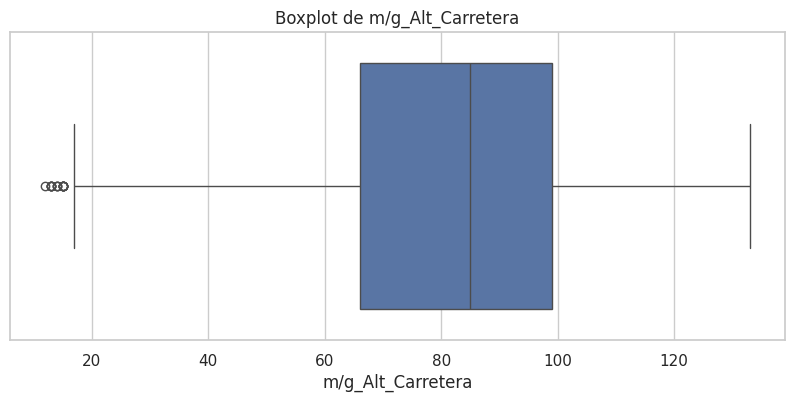

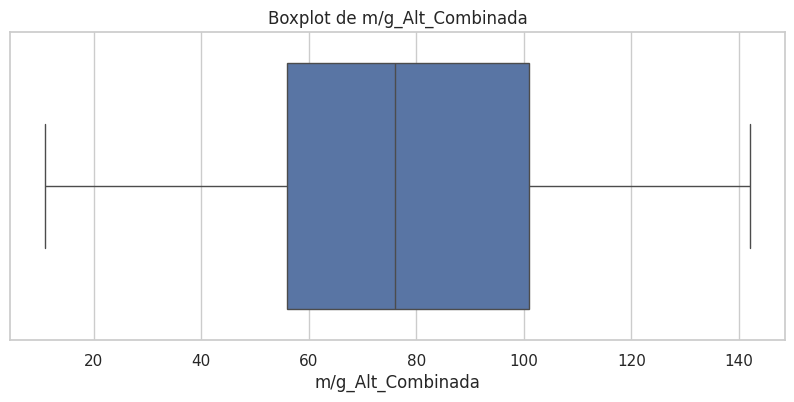

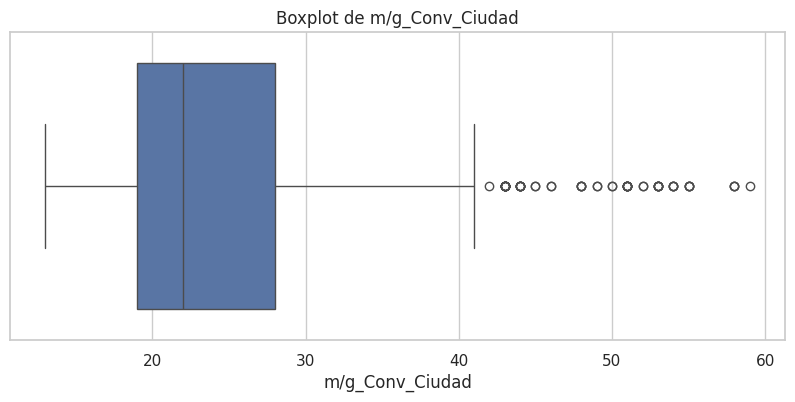

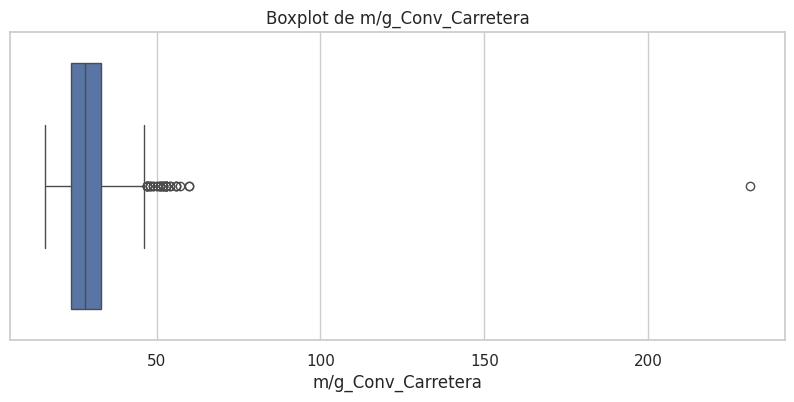

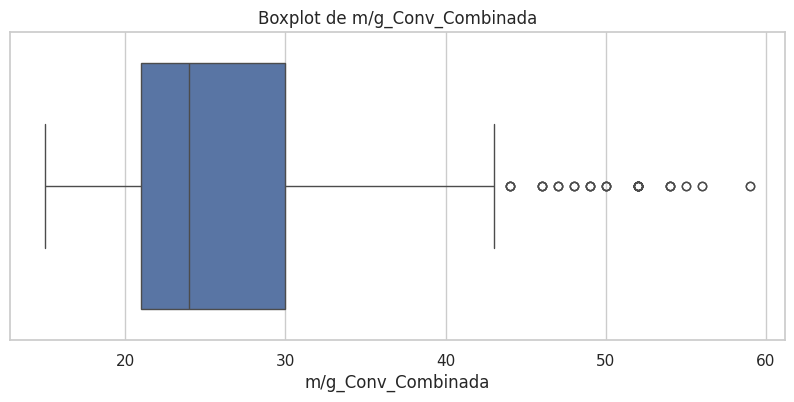

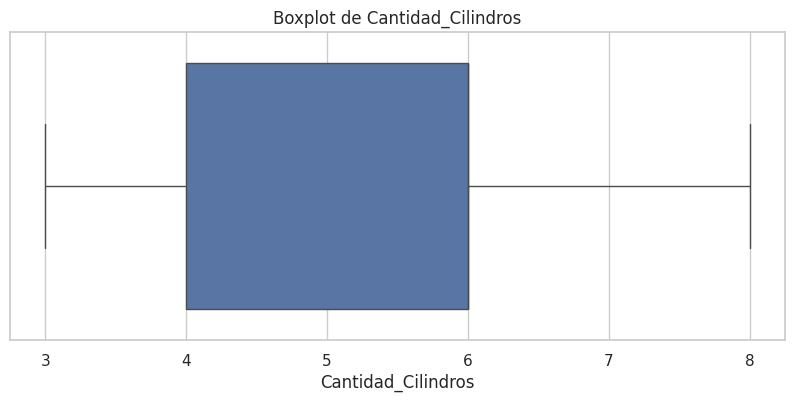

In [14]:
for column in num_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot de {column}')
    plt.show()


Cruce datos

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Categoría            882 non-null    object 
 1   Modelo               882 non-null    object 
 2   Año_modelo           594 non-null    float64
 3   Marca_auto           882 non-null    object 
 4   Combustible          882 non-null    object 
 5   Autonomia_electrico  222 non-null    float64
 6   m/g_alt_ciudad       169 non-null    float64
 7   m/g_Alt_Carretera    169 non-null    float64
 8   m/g_Alt_Combinada    262 non-null    float64
 9   m/g_Conv_Ciudad      444 non-null    float64
 10  m/g_Conv_Carretera   444 non-null    float64
 11  m/g_Conv_Combinada   444 non-null    float64
 12  Transmisión          640 non-null    object 
 13  Tipo_Motor           589 non-null    object 
 14  Tamaño_Motor(L)      589 non-null    object 
 15  Cantidad_Cilindros   449 non-null    flo

In [16]:
# autos más eficientes con combustible convencional
autos_eficientes_convencional = df1.sort_values(by='m/g_Conv_Combinada', ascending=False)[
    ['Categoría', 'Modelo', 'Año_modelo', 'Marca_auto', 'm/g_Conv_Combinada']
]

# autos más eficientes con combustible alternativo
autos_eficientes_alternativo = df1.sort_values(by='m/g_Alt_Combinada', ascending=False)[
    ['Categoría', 'Modelo', 'Año_modelo', 'Marca_auto', 'm/g_Alt_Combinada']
]

# resultados
print("Autos más eficientes con combustible convencional:")
print(autos_eficientes_convencional.head())  

print("\nAutos más eficientes con combustible alternativo:")
print(autos_eficientes_alternativo.head())  


Autos más eficientes con combustible convencional:
       Categoría      Modelo  Año_modelo Marca_auto  m/g_Conv_Combinada
143  Sedan/Wagon  Ioniq Blue      2022.0    Hyundai                59.0
444  Sedan/Wagon  Ioniq Blue      2021.0    Hyundai                59.0
295  Sedan/Wagon   Prius Eco      2022.0     Toyota                56.0
576  Sedan/Wagon   Prius Eco      2021.0     Toyota                56.0
443  Sedan/Wagon       Ioniq      2021.0    Hyundai                55.0

Autos más eficientes con combustible alternativo:
       Categoría                           Modelo  Año_modelo Marca_auto  \
555  Sedan/Wagon  Model 3 Standard Range Plus RWD      2021.0      Tesla   
553  Sedan/Wagon           Model 3 Long Range AWD      2021.0      Tesla   
296  Sedan/Wagon                      Prius Prime      2022.0     Toyota   
577  Sedan/Wagon                      Prius Prime      2021.0     Toyota   
445  Sedan/Wagon                   Ioniq Electric      2021.0    Hyundai   

     m/g_

In [17]:
autos_eficientes_convencional

,Categoría,Modelo,Año_modelo,Marca_auto,m/g_Conv_Combinada
143,Sedan/Wagon,Ioniq Blue,2022.0,Hyundai,59.0
444,Sedan/Wagon,Ioniq Blue,2021.0,Hyundai,59.0
295,Sedan/Wagon,Prius Eco,2022.0,Toyota,56.0
576,Sedan/Wagon,Prius Eco,2021.0,Toyota,56.0
443,Sedan/Wagon,Ioniq,2021.0,Hyundai,55.0
...,...,...,...,...,...
877,Street Sweeper,HSP,NaN,TYMCO,NaN
878,Step Van,(various models),NaN,Utilimaster,NaN
879,Transit Bus,CX45E,NaN,Van Hool,NaN
880,Tractor,VNR Electric - Class 8,NaN,Volvo,NaN


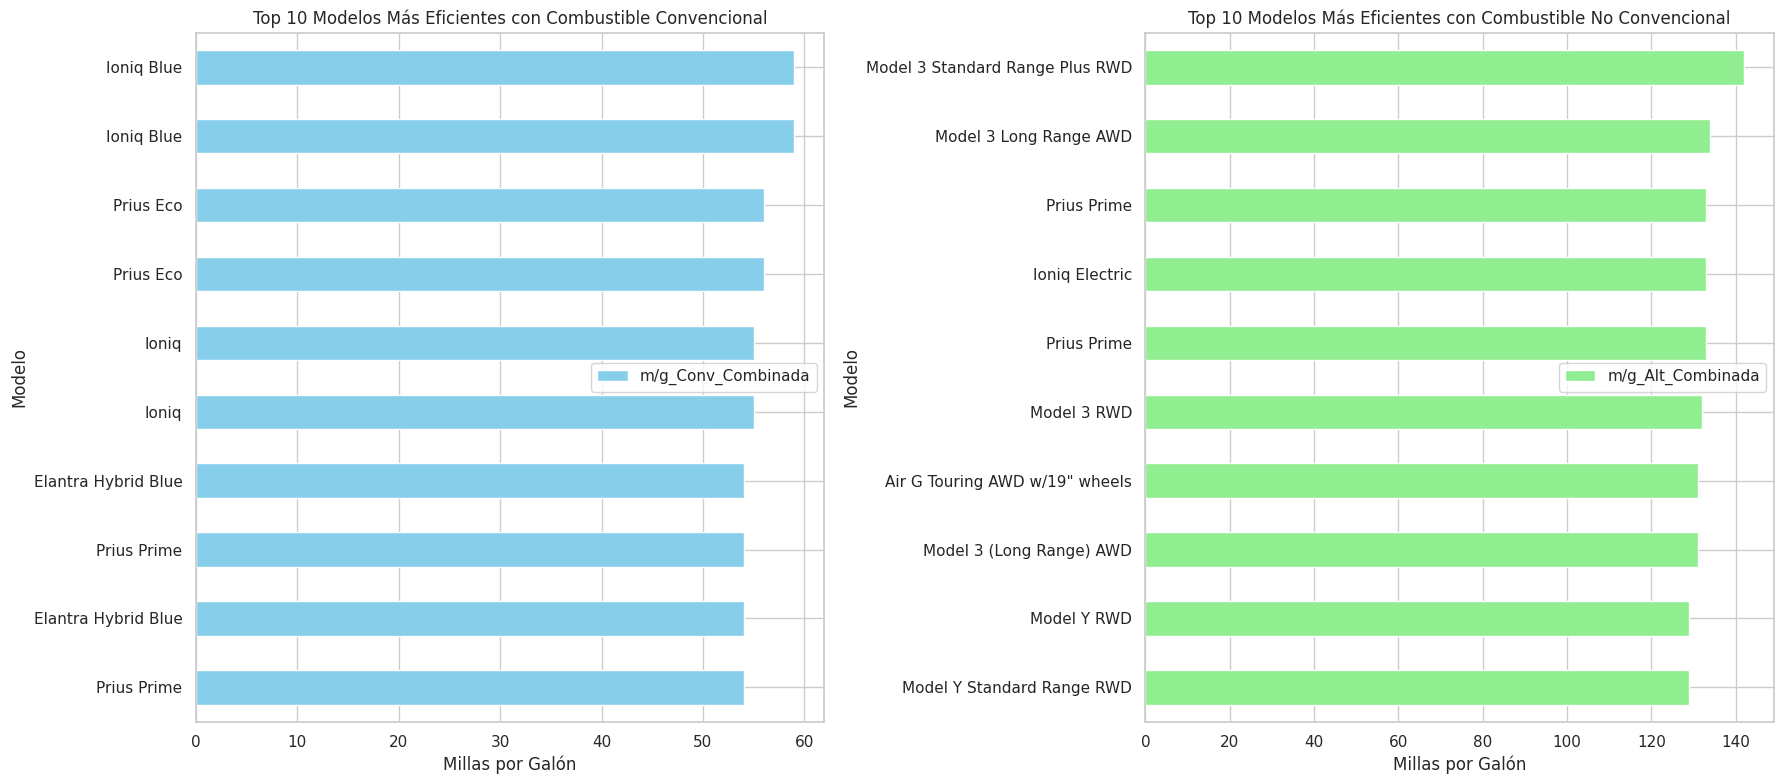

In [18]:
# 10 modelos más eficientes con combustible convencional
top10_convencional = df1.nlargest(10, 'm/g_Conv_Combinada')[['Modelo', 'm/g_Conv_Combinada']]

# 10 modelos más eficientes con combustible alternativo
top10_no_convencional = df1.nlargest(10, 'm/g_Alt_Combinada')[['Modelo', 'm/g_Alt_Combinada']]

# Configurar los gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# gráfico modelos más eficientes con combustible convencional
top10_convencional.plot(kind='barh', x='Modelo', y='m/g_Conv_Combinada', ax=axes[0], color='skyblue')
axes[0].set_title('Top 10 Modelos Más Eficientes con Combustible Convencional')
axes[0].set_xlabel('Millas por Galón')
axes[0].invert_yaxis()  #  modelo con mayor eficiencia arriba en el gráfico

# gráfico modelos más eficientes con combustible alternativo
top10_no_convencional.plot(kind='barh', x='Modelo', y='m/g_Alt_Combinada', ax=axes[1], color='lightgreen')
axes[1].set_title('Top 10 Modelos Más Eficientes con Combustible No Convencional')
axes[1].set_xlabel('Millas por Galón')
axes[1].invert_yaxis()  # invertir para que parta desde el modeo más eficiente

# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
plt.show()
